## Project 1: NYC Resteraunt Violations
### Jacob Minkin

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
sns.set_style('darkgrid')

%matplotlib inline

In [6]:
df = pd.read_csv('../data/Inspection.csv')
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE,INSPECTION DATE,ACTION,...,Census Tract,BIN,BBL,NTA,Location Point,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,50107551,Zazzys,Manhattan,73,GREENWICH AVENUE,10014.0,6465945909,NaN,1/1/1900,NaN,...,7700.0,1010989.0,1.006140e+09,MN23,NaN,NaN,NaN,NaN,NaN,NaN
1,50131697,NaN,Brooklyn,804,GRAND STREET,11211.0,3478078023,NaN,1/1/1900,NaN,...,49500.0,3069635.0,3.027900e+09,BK90,NaN,NaN,NaN,NaN,NaN,NaN
2,50123820,787 COFFEE,Manhattan,310,WEST 14 STREET,10014.0,9082308846,NaN,1/1/1900,NaN,...,7700.0,1011707.0,1.006290e+09,MN23,NaN,NaN,NaN,NaN,NaN,NaN
3,50119514,PEBBLE BAR,Manhattan,1240,AVE OF TH AMER,NaN,7189098636,NaN,1/1/1900,NaN,...,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50127198,Verdes Italian Eatery,Staten Island,4085,VICTORY BOULEVARD,10314.0,6313030934,NaN,1/1/1900,NaN,...,29102.0,5107399.0,5.027710e+09,SI05,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
names = df.DBA.value_counts().head(20)
names

DUNKIN                                   2541
SUBWAY                                   1520
STARBUCKS                                1098
MCDONALD'S                                944
KENNEDY FRIED CHICKEN                     742
POPEYES                                   623
CROWN FRIED CHICKEN                       614
BURGER KING                               612
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     486
DOMINO'S                                  463
DUNKIN',' BASKIN ROBBINS                  411
CHIPOTLE MEXICAN GRILL                    373
DUNKIN'                                   327
KFC                                       277
WENDY'S                                   264
JOE & THE JUICE                           244
PAPA JOHN'S                               239
CARVEL                                    239
TACO BELL                                 218
CHECKERS                                  215
Name: DBA, dtype: int64

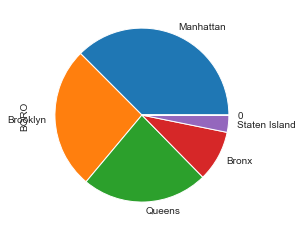

In [7]:
boro = df.BORO.dropna()
boro.describe()
manhattan = sum(df.BORO=='Manhattan')
bronx = sum(df.BORO=='Bronx')

boro.value_counts().plot(kind = 'pie')

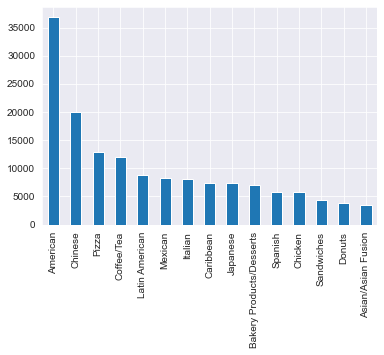

In [8]:
cuisine = df.CUISINE.dropna()
cuisine.value_counts().head(15).plot(kind = 'bar')

In [9]:
violations = df.VIOLATION
violations.value_counts().head(10)

Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.    21186
Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.                                                                                                                                                 16298
Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.                                                                                                                                     14463
Evidence of mice or live mice present in facility's food and/or non-food areas.                                                                              

In [ ]:
df[df.DBA == "STARBUCKS"]



,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE,INSPECTION DATE,ACTION,...,Census Tract,BIN,BBL,NTA,Location Point,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
175,50128822,STARBUCKS,Queens,NaN,AIRPORT TERMINAL B,11371.0,2018218189,NaN,1/1/1900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1861,50015695,STARBUCKS,Brooklyn,341,EASTERN PARKWAY,11216.0,7187780140,Coffee/Tea,11/9/2021,Violations were cited in the following area(s).,...,21900.0,3397468.0,3.012590e+09,BK61,NaN,NaN,NaN,NaN,NaN,NaN
1990,50065956,STARBUCKS,Brooklyn,4,METROTECH CTR,11201.0,6463427139,Coffee/Tea,6/15/2022,Violations were cited in the following area(s).,...,1500.0,3319505.0,3.020590e+09,BK38,NaN,NaN,NaN,NaN,NaN,NaN
2066,41672128,STARBUCKS,Brooklyn,348,FULTON STREET,11201.0,7184881719,Coffee/Tea,7/29/2022,Violations were cited in the following area(s).,...,3700.0,3000418.0,3.001530e+09,BK38,NaN,NaN,NaN,NaN,NaN,NaN
2095,41688653,STARBUCKS,Manhattan,1,PACE PLAZA,10038.0,2123461283,Coffee/Tea,5/1/2019,Violations were cited in the following area(s).,...,1501.0,1001357.0,1.001020e+09,MN25,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208309,41180283,STARBUCKS,Manhattan,655,LEXINGTON AVENUE,10022.0,2123085717,Coffee/Tea,10/20/2022,Violations were cited in the following area(s).,...,10000.0,1036487.0,1.013090e+09,MN19,NaN,NaN,NaN,NaN,NaN,NaN
208390,40400739,STARBUCKS,Manhattan,1325,ASTOR PLACE,NaN,2129823563,Coffee/Tea,7/13/2022,Violations were cited in the following area(s).,...,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208771,40938945,STARBUCKS,Manhattan,286,1 AVENUE,10009.0,2123531214,Coffee/Tea,10/29/2021,Violations were cited in the following area(s).,...,4400.0,1082871.0,1.009720e+09,MN50,NaN,NaN,NaN,NaN,NaN,NaN
208786,40982677,STARBUCKS,Manhattan,2,BROADWAY,10004.0,2123444290,Coffee/Tea,10/29/2019,Violations were cited in the following area(s).,...,900.0,1000029.0,1.000110e+09,MN25,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
STARBUCKS = df['DBA'].str.contains('STARBUCKS', regex=False, na=False)
STARBUCKS = df[STARBUCKS]
Sbucks = df[df.DBA == "Starbucks"]
STARBUCKS = pd.concat([STARBUCKS, Sbucks])
STARBUCKS.CUISINE.value_counts()

Coffee/Tea    1455
American         5
Name: CUISINE, dtype: int64

In [4]:
Dunkin = df['DBA'].str.contains('DUNKIN', regex=False, na=False)
Dunkin = df[Dunkin]
#Dbucks = df[df.DBA == "Dunkin"]
#STARBUCKS = pd.concat([STARBUCKS, Sbucks])
Dunkin.CUISINE.value_counts()


Donuts              3489
American             277
Coffee/Tea           160
Chicken               13
Other                 11
Sandwiches            10
Pizza                  8
Eastern European       8
Hotdogs/Pretzels       3
Jewish/Kosher          3
Name: CUISINE, dtype: int64

In [17]:
Coffee = df['DBA'].str.contains('COFFEE', regex=False, na=False)
Coffee = df[Coffee]
Coffee[Coffee.CUISINE =='Pizza']

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE,INSPECTION DATE,ACTION,...,BIN,BBL,NTA,Location Point,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,date
11479,50103129,SKILLMAN'S FAMOUS PIZZA & COFFEE SHOP,Queens,4606,SKILLMAN AVE,11104.0,7189624889,Pizza,3/9/2020,Violations were cited in the following area(s).,...,4001252.0,4.001370e+09,QN31,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-09
14806,50051127,MOMENTO'S PIZZA COFFEE SHOP,Queens,4053,99TH ST,11368.0,7187792026,Pizza,1/25/2023,Violations were cited in the following area(s).,...,4040280.0,4.016080e+09,QN26,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-25
17798,41477814,"2 BROS PIZZA, CORVO COFFEE",Manhattan,542,9 AVENUE,10018.0,2126952642,Pizza,6/11/2019,Violations were cited in the following area(s).,...,1013697.0,1.007630e+09,MN15,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-11
20405,50103129,SKILLMAN'S FAMOUS PIZZA & COFFEE SHOP,Queens,4606,SKILLMAN AVE,11104.0,7189624889,Pizza,7/8/2022,Violations were cited in the following area(s).,...,4001252.0,4.001370e+09,QN31,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-08
23656,50051127,MOMENTO'S PIZZA COFFEE SHOP,Queens,4053,99TH ST,11368.0,7187792026,Pizza,1/25/2023,Violations were cited in the following area(s).,...,4040280.0,4.016080e+09,QN26,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-25
25206,50087832,BELLA PIZZA COFFEE BAR,Queens,4006,JUNCTION BLVD,11368.0,9292080065,Pizza,12/12/2019,Violations were cited in the following area(s).,...,4039789.0,4.015940e+09,QN29,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-12
31183,50087832,BELLA PIZZA COFFEE BAR,Queens,4006,JUNCTION BLVD,11368.0,9292080065,Pizza,11/20/2019,Violations were cited in the following area(s).,...,4039789.0,4.015940e+09,QN29,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-20
42761,41477814,"2 BROS PIZZA, CORVO COFFEE",Manhattan,542,9 AVENUE,10018.0,2126952642,Pizza,4/12/2022,Violations were cited in the following area(s).,...,1013697.0,1.007630e+09,MN15,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-12
44222,50087832,BELLA PIZZA COFFEE BAR,Queens,4006,JUNCTION BLVD,11368.0,9292080065,Pizza,9/22/2022,Violations were cited in the following area(s).,...,4039789.0,4.015940e+09,QN29,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-22
48795,50103129,SKILLMAN'S FAMOUS PIZZA & COFFEE SHOP,Queens,4606,SKILLMAN AVE,11104.0,7189624889,Pizza,3/9/2020,Violations were cited in the following area(s).,...,4001252.0,4.001370e+09,QN31,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-09


## Lets try to sort through the inspections

In [3]:
id_num = df.CAMIS.unique()
len(id_num)

28239

In [4]:
df['INSPECTION DATE']
df['date'] = pd.to_datetime(df['INSPECTION DATE'])

In [19]:
latest_ins = df.groupby(['CAMIS', "DBA", 'CUISINE'], sort = True)['INSPECTION DATE'].max()


In [22]:
latest_ins

CAMIS     DBA                                 CUISINE                 
30075445  MORRIS PARK BAKE SHOP               Bakery Products/Desserts    8/10/2021
30112340  WENDY'S                             Hamburgers                   8/5/2021
30191841  DJ REYNOLDS PUB AND RESTAURANT      Irish                        6/6/2019
40356018  RIVIERA CATERERS                    American                     2/1/2022
40356483  WILKEN'S FINE FOOD                  Sandwiches                   8/3/2022
                                                                            ...    
50131842  MCDONALD'S                          Hamburgers                   2/9/2023
50131852  THE B'ALUK'S CRAVINGS               Spanish                      2/6/2023
50131861  EFFY'S CAFE                         Jewish/Kosher               1/30/2023
50131864  RACER TECHNOLOGIES (GHOST KITCHEN)  Other                       1/27/2023
50131892  Pokeplus                            Hawaiian                     2/6/2023
Name:

In [26]:
df[df.CUISINE == 'Jewish/Kosher'].BORO.value_counts()

Brooklyn         1769
Manhattan         639
Queens            500
Bronx              79
Staten Island       7
Name: BORO, dtype: int64

In [28]:
df.CUISINE.isnull().sum()

4358

In [31]:
df.isnull().sum(axis = 0)


CAMIS                          0
DBA                         1722
BORO                           0
BUILDING                     340
STREET                        26
ZIPCODE                     2933
PHONE                         14
CUISINE                     4358
INSPECTION DATE                0
ACTION                      4358
VIOLATION CODE              5681
VIOLATION                   5681
CRITICAL FLAG                  0
SCORE                      10915
GRADE                     106150
GRADE DATE                113158
RECORD DATE                    0
INSPECTION TYPE             4358
Latitude                     298
Longitude                    298
Community Board             3468
Council District            3468
Census Tract                3468
BIN                         4561
BBL                          561
NTA                         3468
Location Point            209579
Zip Codes                 209579
Community Districts       209579
Borough Boundaries        209579
City Counc

In [10]:
df.SCORE

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
209574    50.0
209575    56.0
209576    13.0
209577    12.0
209578     NaN
Name: SCORE, Length: 209579, dtype: float64

In [37]:
df['RECORD DATE'].value_counts()

2/13/2023    209579
Name: RECORD DATE, dtype: int64

In [43]:
variables = ['CAMIS',  'BORO', 'GRADE']
df_selected = df[variables]

In [46]:
df_selected.GRADE.value_counts()

A    74620
B     9498
N     7017
Z     6647
C     4889
P      758
Name: GRADE, dtype: int64

In [14]:
df.GRADE.isnull().value_counts()

True     106150
False    103429
Name: GRADE, dtype: int64

In [15]:
df[df.GRADE.isnull()]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE,INSPECTION DATE,ACTION,...,Census Tract,BIN,BBL,NTA,Location Point,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,50107551,Zazzys,Manhattan,73,GREENWICH AVENUE,10014.0,6465945909,NaN,1/1/1900,NaN,...,7700.0,1010989.0,1.006140e+09,MN23,NaN,NaN,NaN,NaN,NaN,NaN
1,50131697,NaN,Brooklyn,804,GRAND STREET,11211.0,3478078023,NaN,1/1/1900,NaN,...,49500.0,3069635.0,3.027900e+09,BK90,NaN,NaN,NaN,NaN,NaN,NaN
2,50123820,787 COFFEE,Manhattan,310,WEST 14 STREET,10014.0,9082308846,NaN,1/1/1900,NaN,...,7700.0,1011707.0,1.006290e+09,MN23,NaN,NaN,NaN,NaN,NaN,NaN
3,50119514,PEBBLE BAR,Manhattan,1240,AVE OF TH AMER,NaN,7189098636,NaN,1/1/1900,NaN,...,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50127198,Verdes Italian Eatery,Staten Island,4085,VICTORY BOULEVARD,10314.0,6313030934,NaN,1/1/1900,NaN,...,29102.0,5107399.0,5.027710e+09,SI05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209570,50087721,LONG ACRE TAVERN,Manhattan,146,WEST 47 STREET,10036.0,6466493587,American,4/13/2022,Violations were cited in the following area(s).,...,12500.0,1022670.0,1.009990e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN
209573,50099916,DHAKA GARDEN,Queens,7223,37TH AVE,11372.0,7184248600,Bangladeshi,10/30/2019,Violations were cited in the following area(s).,...,29100.0,4462992.0,4.012720e+09,QN28,NaN,NaN,NaN,NaN,NaN,NaN
209574,50052840,US FRIED CHICKEN & PIZZA,Brooklyn,129,DWIGHT STREET,11231.0,7186434662,Chicken,6/22/2022,Violations were cited in the following area(s).,...,5300.0,3008667.0,3.005780e+09,BK33,NaN,NaN,NaN,NaN,NaN,NaN
209575,50072454,DUNKIN,Manhattan,381,CANAL STREET,10013.0,2126191222,Donuts,8/22/2022,Violations were cited in the following area(s).,...,4700.0,1002935.0,1.002270e+09,MN24,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.CUISINE.isnull()

0          True
1          True
2          True
3          True
4          True
          ...  
209574    False
209575    False
209576    False
209577    False
209578    False
Name: CUISINE, Length: 209579, dtype: bool

In [19]:
df.rename(columns = {'VIOLATION CODE':'CODE'}, inplace = True)


In [35]:
df.CODE[(df.CODE == '04K') | (df.CODE == '04L') ].value_counts()

04L    14521
04K     2025
Name: CODE, dtype: int64

In [25]:
df.CODE

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
209574    06D
209575    04N
209576    08A
209577    02G
209578    20D
Name: CODE, Length: 209579, dtype: object